# 5. DATA VISUALIZATION

(by Tomislav Kartalov, FEEIT, CMUS, Macedonia)

In this chapter, you will learn to **represent the data** in different visual contexts and patterns. The tools required are **Jupyter Notebook** and **Python**.

Visualization is important for understanding the data by placing it in a visual context, so that **patterns, trends, and correlations** can be detected.



## 5.1. Creating and importing the data set

You can create your data set manually, or you can obtain it from the Internet, from services such as [Kaggle](https://www.kaggle.com/datasets). More about data set management can be found in [Chapter 3](https://colab.research.google.com/github/VALENCEML/eBOOK/blob/main/EN/03/3.%20DATA%20SET%20MANAGEMENT.ipynb).

Make sure that your data is organized in the **csv** (comma-separated values) format, and saved as a file on your computer.

For the following examples, we are going to use the [Students Performance in Exams](https://www.kaggle.com/datasets/whenamancodes/students-performance-in-exams) data set, however, you are free to use any data set you like. The file on the computer is named *exams.csv*.

The following code will import the *pandas* library for data manipulation and analysis, as well as the *numpy* library for high-level mathematical functions:

In [1]:
import pandas as pd
import numpy as np

Sada se skup podataka može uvesti i pregledati:

In [2]:
Students = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/exams.csv')
Students.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Takođe, mogu se proveriti tipovi podataka i struktura podataka u skupu podataka:

In [3]:
Students.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


U nastavku su prikazane dve različite biblioteke za vizuelizaciju podataka, **seaborn** i **pyplot**, svaka sa određenim prednostima u odnosu na drugu. Uopšteno, pyplot se koristi za pravljenje osnovnih grafikona koji se sastoje od linija, grafikona, kružnih dijagrama, stubičastih grafikona itd., dok seaborn koristi obrasce za prikaz. Sintaksa pyplot je nešto složenija, ali i robusnija i prilagodljivija, od sintakse seaborn.

## 5.2. Biblioteka seaborn

Biblioteka seaborn je sjajna za statističku analizu, kao i za celovito istraživanje i razumevanje podataka. Evo jednog mogućeg načina za uvoz biblioteke i postavljanje paleta boja:

In [4]:
import seaborn as sbn
sbn.set(color_codes=True)

Sada možemo analizirati univarijantnu, bivarijantnu ili multivarijantnu statistiku skupa podataka. Počevši sa nečim jednostavnim, kao što je distribucija polova učenika, bilo bi:

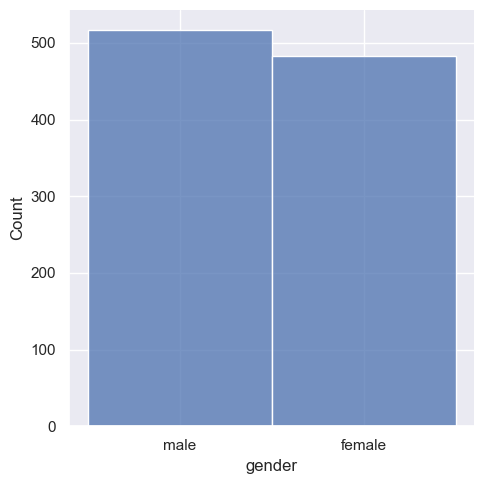

In [5]:
sbn.displot(Students['gender'])

Vežba: probajte sa drugim parametrima umesto pola!

Primer bivarijantne statistike, vizuelne korelacije između rezultata čitanja i pisanja, može se lako dobiti pomoću:

In [6]:
sbn.jointplot(data=Students, x="reading score", y="writing score")

Vežba: probajte zameniti jedan od parametara sa matematičkim rezultatom! Možete li uočiti slabljenje korelacije? Možete li to objasniti?

Bojenje tačaka podataka takođe može zavisiti o nekim parametrima podataka, što doprinosi važnim saznanjima. Na primer, uticaj pohađanja pripremnog kursa za ispite na rezultate ispita može se vizuelizovati sa:

In [7]:
sbn.jointplot(data=Students, x="reading score", y="writing score", hue = 'test preparation course')

Vežba: posmatrajte uticaj nekih drugih parametara, pol, rasa, roditeljski nivo obrazovanja... možete li uočiti bilo kakvu statističku važnost?

Ako nismo sigurni koji parametri u skupu podataka su korelirani, funkcija pairplot je sjajan način za automatsko generisanje parnih odnosa između relevantnih parametara u skupu podataka:

In [8]:
sbn.pairplot(Students, hue='gender')

Ovo stvara mrežu grafikona koja ispituje bivarijantne odnose između svakog para parametara. Grafovi na glavnoj dijagonali su univarijantni dijagrami distribucije.

Takođe je moguće reorganizovati mrežu, da prikaže podskup parametara ili da iscrtava različite promenljive u redovima

In [9]:
sbn.pairplot(Students,x_vars=['writing score','reading score'],y_vars=['reading score','writing score','math score'],hue='test preparation course')

**Vežba**: eksperimentišite sa drugim funkcijama za vizualizaciju iz seaborn biblioteke, npr. stripplot, boxplot, barplot, countplot ...

## 5.3. Pyplot biblioteka

Pyplot je modul paketa **matplotlib**, snažne biblioteke za crtanje grafikona za Python i NumPy. Pruža objektno orijentisani API za crtanje grafikona i ugrađivanje u aplikacije. Iako može dobiti slične vizualizacije kao seaborn, sintaksa za dobijanje istih je nešto složenija. Seaborn je implementirao neke više nivoe funkcija za statističku analizu, dok pyplot ima pristup korak po korak i širu kontrolu nad parametrima grafikona.
Evo jednog mogućeg načina za uvoz pyplot-a:

In [10]:
from matplotlib import pyplot as plt

Sada možemo analizirati univarijantnu, bivarijantnu ili multivarijantnu statistiku skupa podataka. Treba uvesti i Pandas, numpy i skup podataka Students (pogledajte početak ovog predavanja).
Počevši sa nečim jednostavnim, kao što je distribucija polova učenika, možemo učiniti sledeće:

In [11]:
counts = Students.gender.value_counts()
plt.bar(["male","female"],counts)

<BarContainer object of 2 artists>

Primetite kako je grafikon donekle sličan onom dobijenom pomoću seaborn-a, međutim, proces generisanja je potpuno drugačiji. Seaborn automatski izvršava brojanje i imenovanje kolona, dok ovde eksplicitno navodimo šta želimo na grafikonu. Ovo poslednje je malo više vremenski zahtevno, ali nam daje veću kontrolu i mogućnosti za prilagođavanje.
Pokušajmo staviti iste podatke u drugu vrstu grafikona:

In [12]:
plt.pie(counts, labels =["male","female"] )


([<matplotlib.patches.Wedge at 0x1b416ae44f0>,
 [Text(-0.05871992619937442, 1.0984315956249346, 'male'),
  Text(0.058720029041962135, -1.0984315901271737, 'female')])

**Vežba**: eksperimentišite sa širokom paletom parametara za vizualizaciju, kao što su explode, colors, shadow, startangle, itd. O pravilnoj sintaksi možete pročitati ovde matplotlib.pyplot.pie

Sada pokušajmo replicirati grafikon bivarijantne statistike, vizuelne korelacije između rezultata čitanja i pisanja:

In [13]:
plt.scatter(Students['math score'],Students['reading score'])


Ovaj grafikon je osnovni oblik podataka. Možemo dodati malo šminke i učiniti ga informativnijim:

In [14]:
plt.scatter(Students['math score'],Students['reading score'],c=Students['gender']=="male",cmap='jet')
plt.title("reading vs. math")
plt.xlabel("math")
plt.ylabel("reading")

Text(0, 0.5, 'reading')

Vežba: pokušajte staviti različite podatke u grafikon (pisanje, čitanje, matematika). Igrajte se sa bojama. O pravilnoj sintaksi možete pročitati ovde matplotlib.pyplot.scatter

Jedan važan aspekt vizuelizacije podataka su **linijski grafikoni**. zavanje kontinuiranih podataka i za razumevanje njihovih obrazaca i trendova. Pyplot je posebno snažan alat za crtanje i prilagođavanje linijskih grafikona. Kako bismo ilustrovali to, uvešćemo još jedan skup podataka: [Populacija zemlje 1960-2018](https://www.kaggle.com/datasets/imdevskp/world-population-19602018?select=population_total_long.csv).
(obavezno preuzmite csv datoteku na vaš računar)..

In [15]:
Population = pd.read_csv('https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/05/population_total_long.csv')
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12595 entries, 0 to 12594
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  12595 non-null  object
 1   Year         12595 non-null  int64 
 2   Count        12595 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 295.3+ KB


Pokušajmo prikazati broj stanovnika Makedonije tokom godina. Za to prvo moramo izdvojiti podatke za Makedoniju iz podataka za druge zemlje:

In [16]:
Macedonia = Population[Population.CountryName == 'Macedonia']

Sada možemo prikazati broj stanovnika tokom godina. Horizontalna osa treba da bude godine, a vertikalna osa broj stanovnika.

In [17]:
plt.plot(Macedonia.Year, Macedonia.Count)

Primetite broj 1e6 iznad gornjeg levog ugla grafikona. Taj broj pokazuje da brojeve označene na vertikalnoj osi treba pomnožiti tim faktorom. Ako želimo prikazati brojeve već konvertovane u milione, tada se može izvršiti sledeće:

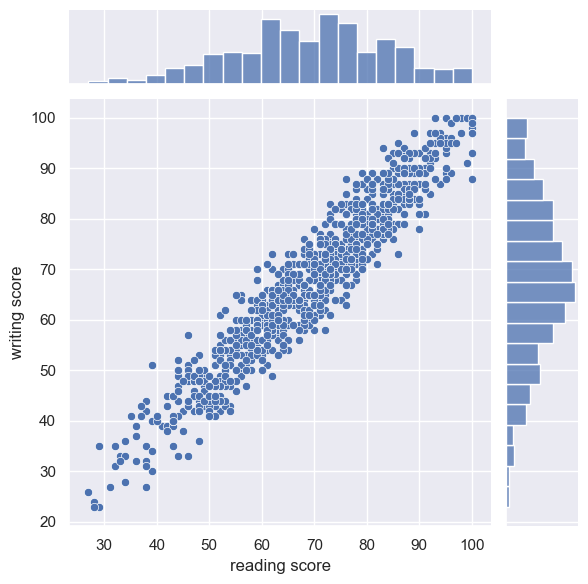

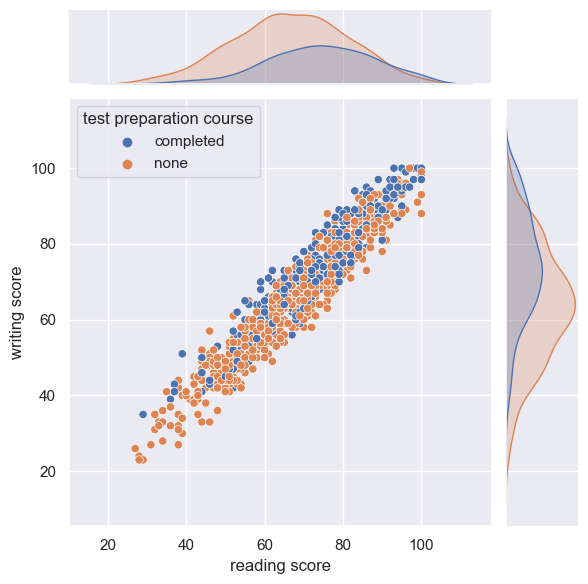

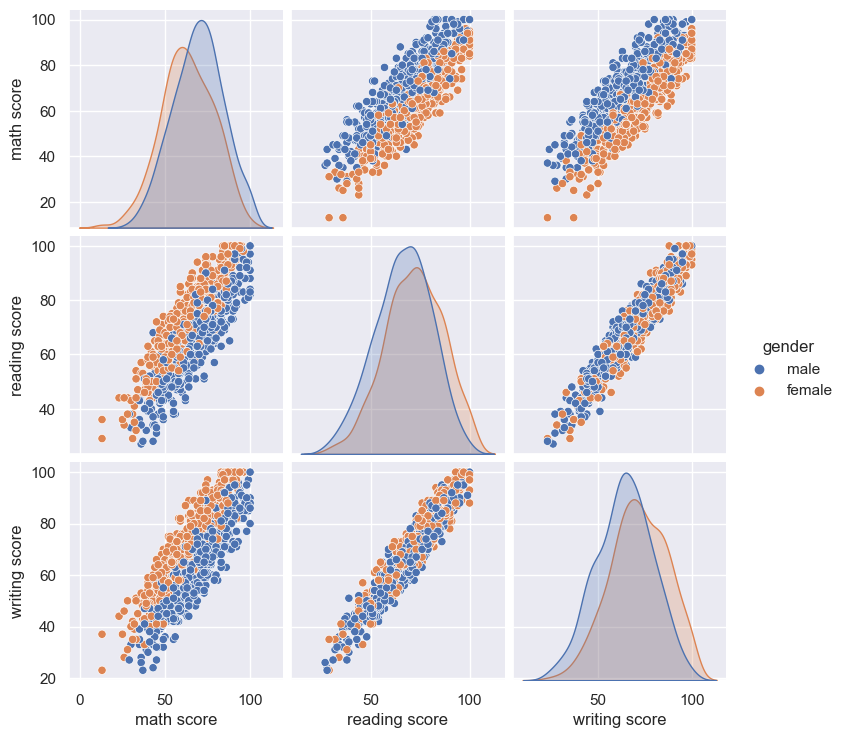

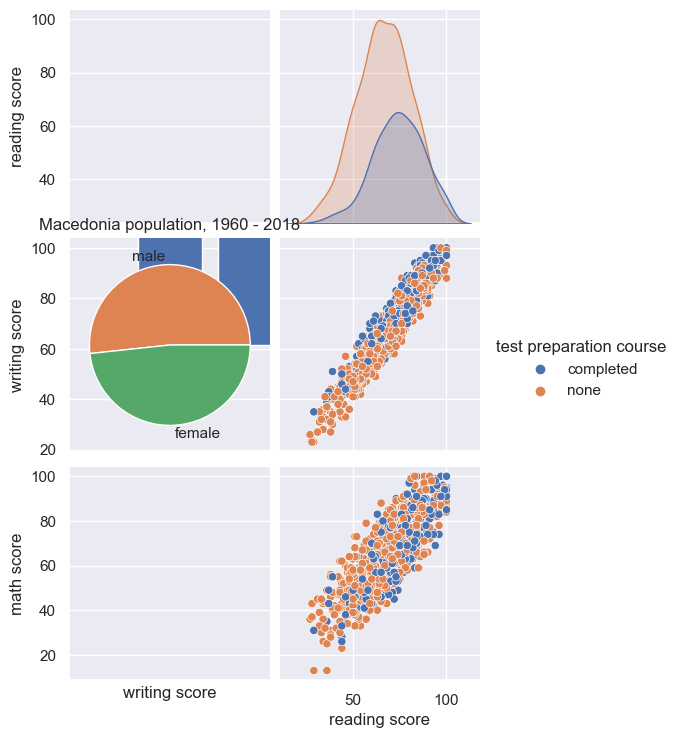

In [18]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.title("Macedonia population, 1960 - 2018")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.show()

Vežba: Pokušajte da prikažete podatke za vašu zemlju ili za neku drugu zemlju sveta. Imena zemalja koje su obuhvaćene podacima mogu se videti ako otvorite podatke za pregledanje ili možete direktno otvoriti sačuvani CSV fajl.

Sada pokušajmo da uporedimo broj stanovnika u Makedoniji i Sloveniji tokom godina (ne zaboravite prvo da izdvojite podatke):

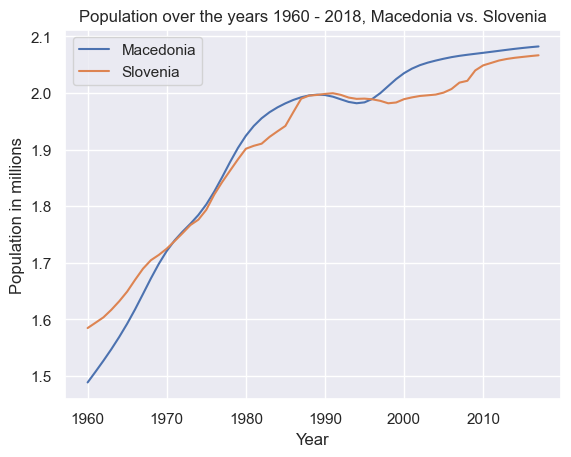

In [19]:
Slovenia = Population[Population.CountryName == 'Slovenia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia"])
plt.show()

Dodajmo i Srbiju na grafikon:

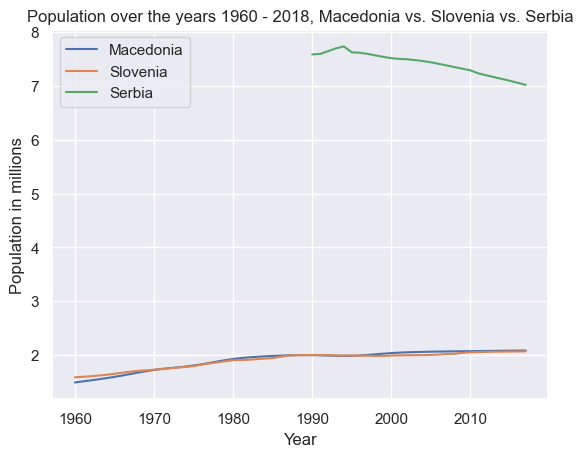

In [20]:
Serbia = Population[Population.CountryName == 'Serbia']
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.title("Population over the years 1960 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

Vidimo da su podaci za Srbiju nepotpuni i da počinju samo u 1990. godini. Da bismo prikazali samo opseg u kojem su dostupni podaci za sve tri zemlje, možemo ograničiti horizontalnu osu:

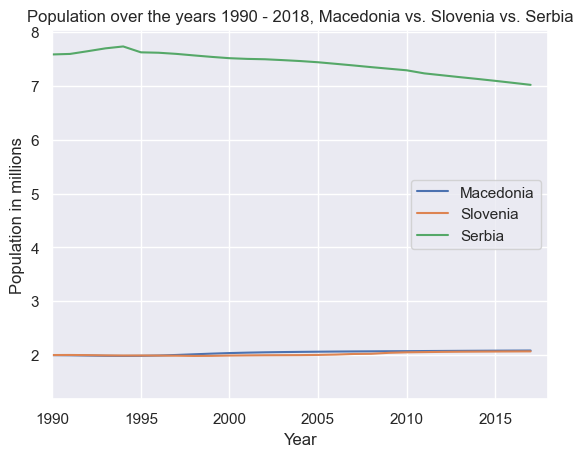

In [21]:
plt.plot(Macedonia.Year, Macedonia.Count / 10**6)
plt.plot(Slovenia.Year, Slovenia.Count / 10**6)
plt.plot(Serbia.Year, Serbia.Count / 10**6)
plt.xlim([1990,2018])
plt.title("Population over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("Population in millions")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

Primetite kako je legenda automatski premestena na drugu lokaciju, kako bi se ne bi smetala linijama.

Apsolutni broj stanovnika prikazan na istom grafikonu čini linije za Makedoniju i Sloveniju vrlo blizu jedna drugoj, jer su obe male u poređenju sa stanovništvom u Srbiji. Međutim, možda bi informativniji grafikon bio relativni rast stanovništva, tokom godina. Da bismo podatke učinili relativnim, treba da postavimo referentno stanovništvo. Recimo da će populacija iz 1990. godine biti naša referenca, i da ćemo tom broju dodeliti vrednost od 100%. Zatim, svaka druga godina će biti izračunata u odnosu na referencu.

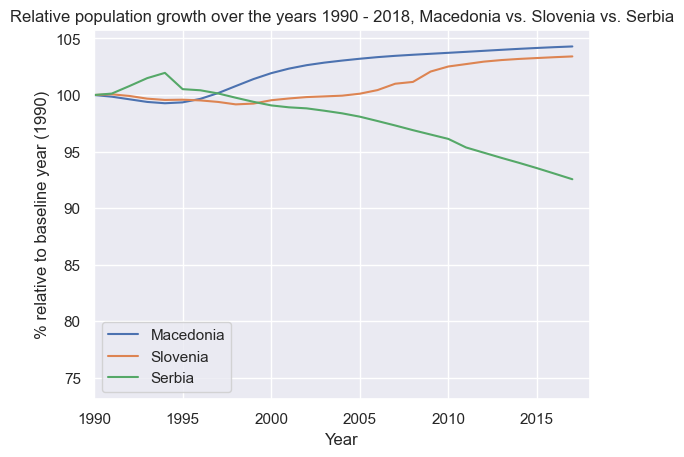

In [22]:
MacReference = float(Macedonia.Count[Macedonia.Year == 1990])     # casting to float, in order to use for calculations
SloReference = float(Slovenia.Count[Slovenia.Year == 1990])
SerReference = float(Serbia.Count[Serbia.Year == 1990])

MacRelative = pd.to_numeric(Macedonia.Count,errors='coerce') / MacReference  # Note how a series of data is cast into float
SloRelative = pd.to_numeric(Slovenia.Count,errors='coerce') / SloReference 
SerRelative = pd.to_numeric(Serbia.Count,errors='coerce') / SerReference 

plt.plot(Macedonia.Year, MacRelative * 100)    # multiply by 100 to make it percentage
plt.plot(Slovenia.Year, SloRelative * 100)
plt.plot(Serbia.Year, SerRelative * 100)
plt.xlim([1990,2018])
plt.title("Relative population growth over the years 1990 - 2018, Macedonia vs. Slovenia vs. Serbia")
plt.xlabel("Year")
plt.ylabel("% relative to baseline year (1990)")
plt.legend(["Macedonia","Slovenia", "Serbia"])
plt.show()

**Vežbe i dalje čitanje**:

Pokušajte da promenite boje linija da se podudaraju sa bojama nacionalnih sportskih timova iz tri zemlje (Makedonija: crvena, Slovenija: zelena, Srbija: plava).
Pokušajte da ograničite vertikalnu osu na relevantni deo grafikona.
Eksperimentišite sa stilovima linija (punom, isprekidanom, tačkastom...) i markerima linija (krug, trougao, zvezda...)

Dokumentacija o pravilnoj sintaksi može se naći ovde. [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)
